<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/ver%205.2/wat_r10_model_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [1]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

In [0]:
dfgurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r10-good.csv?token=AKVFSOFRWNT7UWMGRHJMSLK6X3OD4"
dfmurl =  "https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/ver%205.2/wat-r10-mal.csv?token=AKVFSOH5CV7NF37TKYOFLUK6X3OEC"

dfg = pd.read_csv(dfgurl)
dfm = pd.read_csv(dfmurl)

Characteristics of Dataset

In [4]:
dfg

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,820,1,3,1,1,4,3,9,0,0,30,14,8,5,4,0.800000,20,1,1,1,1,1,3,1,4,32,3,27,9,1
1,936,4,2,2,1,4,3,9,27,11,29,13,9,3,1,0.333333,8,1,1,1,1,1,8,2,8,72,6,27,18,1
2,1358,0,3,1,1,4,3,9,0,0,26,10,13,4,4,1.000000,20,1,1,1,1,1,0,1,4,52,3,27,9,1
3,1366,4,0,2,1,4,3,9,26,10,29,13,13,2,0,0.000000,4,1,1,1,1,1,0,2,8,104,6,27,18,1
4,1418,0,1,3,1,4,3,9,29,13,26,10,13,2,2,1.000000,12,1,1,1,1,1,0,3,12,156,9,27,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8592,3250453,1,3,5,2,2,3,9,0,0,30,14,10016,5,4,0.800000,27,1,1,1,1,1,3,10,20,200320,15,27,45,1
8593,3250460,1,3,5,3,2,3,9,0,0,30,14,10016,5,4,0.800000,34,1,1,1,1,1,3,15,30,300480,15,27,45,1
8594,3250467,1,3,5,4,2,3,9,0,0,30,14,10016,5,4,0.800000,41,1,1,1,1,1,3,20,40,400640,15,27,45,1
8595,3250474,1,3,5,5,3,3,9,0,0,30,14,10016,5,4,0.800000,48,1,1,1,1,1,3,25,75,751200,15,27,45,1


In [5]:
dfm

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,764,1,3,1,1,4,3,9,1,1,30,14,16,4,3,0.750000,16,1,1,1,1,1,3,1,4,64,3,27,9,0
1,836,1,3,1,1,4,3,9,0,0,30,14,17,5,4,0.800000,20,1,1,1,1,1,3,1,4,68,3,27,9,0
2,872,4,2,2,1,4,3,9,27,11,29,13,18,3,1,0.333333,8,1,1,1,1,1,8,2,8,144,6,27,18,0
3,950,4,2,2,1,4,3,9,27,11,29,13,19,3,1,0.333333,8,1,1,1,1,1,8,2,8,152,6,27,18,0
4,1277,0,3,1,1,4,3,9,1,1,26,10,26,3,3,1.000000,16,1,1,1,1,1,0,1,4,104,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8780,2021386,4,0,6,4,2,3,12,26,10,29,13,11078,2,0,0.000000,25,1,1,1,1,1,0,24,48,531744,18,36,54,0
8781,2021393,4,0,6,5,3,3,12,26,10,29,13,11078,2,0,0.000000,32,1,1,1,1,1,0,30,90,997020,18,36,54,0
8782,2021394,4,0,2,1,4,3,9,26,10,29,13,11079,2,0,0.000000,32,1,1,1,1,1,0,2,8,88632,6,27,18,0
8783,2021395,4,0,7,1,4,3,10,26,10,1,1,11078,3,0,0.000000,5,1,1,1,1,1,0,7,28,310184,21,30,63,0


In [0]:
df = dfg.append(dfm, ignore_index=True,sort=False)

In [7]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.sort_values('timestamp')
df.to_csv('wat-r1-model.csv',index=False)

In [9]:
df = pd.read_csv("wat-r1-model.csv")
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,764,1,3,1,1,4,3,9,1,1,30,14,16,4,3,0.750000,16,1,1,1,1,1,3,1,4,64,3,27,9,0
1,820,1,3,1,1,4,3,9,0,0,30,14,8,5,4,0.800000,20,1,1,1,1,1,3,1,4,32,3,27,9,1
2,836,1,3,1,1,4,3,9,0,0,30,14,17,5,4,0.800000,20,1,1,1,1,1,3,1,4,68,3,27,9,0
3,872,4,2,2,1,4,3,9,27,11,29,13,18,3,1,0.333333,8,1,1,1,1,1,8,2,8,144,6,27,18,0
4,936,4,2,2,1,4,3,9,27,11,29,13,9,3,1,0.333333,8,1,1,1,1,1,8,2,8,72,6,27,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17377,3250453,1,3,5,2,2,3,9,0,0,30,14,10016,5,4,0.800000,27,1,1,1,1,1,3,10,20,200320,15,27,45,1
17378,3250460,1,3,5,3,2,3,9,0,0,30,14,10016,5,4,0.800000,34,1,1,1,1,1,3,15,30,300480,15,27,45,1
17379,3250467,1,3,5,4,2,3,9,0,0,30,14,10016,5,4,0.800000,41,1,1,1,1,1,3,20,40,400640,15,27,45,1
17380,3250474,1,3,5,5,3,3,9,0,0,30,14,10016,5,4,0.800000,48,1,1,1,1,1,3,25,75,751200,15,27,45,1


In [10]:
df.corr()

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
timestamp,1.000000,0.039918,0.013554,0.046957,0.016981,-0.024499,NaN,-0.009598,0.024724,0.020296,-0.009019,-0.002423,0.846695,0.059789,0.008808,-0.018863,0.022036,-0.296530,-0.296525,-0.356354,-0.291200,-0.237177,0.074172,0.026661,0.021340,0.454112,0.046957,-0.009598,0.046957,0.438101
outport,0.039918,1.000000,-0.724040,0.404714,-0.021414,0.030912,NaN,0.438730,0.868608,0.838666,-0.155277,-0.012927,0.038543,-0.526957,-0.910380,-0.957177,-0.471682,-0.006540,0.088995,0.049546,0.045588,0.031680,0.436331,0.132802,0.135358,0.116620,0.404714,0.438730,0.404714,0.017608
inport,0.013554,-0.724040,1.000000,-0.259504,0.089898,-0.129771,NaN,-0.567598,-0.798875,-0.769207,0.163343,0.103555,0.016372,0.782516,0.895733,0.856777,0.533340,-0.035322,-0.162961,-0.119144,-0.104528,-0.084159,0.240540,-0.032033,-0.060208,-0.034029,-0.259504,-0.567598,-0.259504,-0.003461
cache_coherence_type,0.046957,0.404714,-0.259504,1.000000,0.363151,-0.524222,NaN,0.013282,0.305136,0.286544,-0.317422,-0.253853,0.052729,-0.087014,-0.349600,-0.396842,-0.505477,0.019183,0.007303,0.015915,0.014376,0.011932,0.167117,0.536943,0.438948,0.332151,1.000000,0.013282,1.000000,0.015443
flit_id,0.016981,-0.021414,0.089898,0.363151,1.000000,-0.129646,NaN,-0.201331,-0.117774,-0.127150,0.280088,0.274855,0.020968,-0.005540,0.073689,0.030494,0.513368,0.039475,-0.015669,0.014304,0.030572,0.023263,0.005466,0.974010,0.928869,0.683409,0.363151,-0.201331,0.363151,0.003255
flit_type,-0.024499,0.030912,-0.129771,-0.524222,-0.129646,1.000000,NaN,0.290630,0.170011,0.183546,-0.404318,-0.396764,-0.030267,0.007997,-0.106373,-0.044019,0.294072,-0.044141,0.093236,0.029500,0.007867,0.002553,-0.007891,-0.213677,0.059551,0.040779,-0.524222,0.290630,-0.524222,-0.004698
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,-0.009598,0.438730,-0.567598,0.013282,-0.201331,0.290630,NaN,1.000000,0.377974,0.346597,-0.314268,-0.254232,-0.006723,-0.304599,-0.501518,-0.556967,-0.214678,0.028726,0.132472,0.096860,0.096259,0.083685,-0.191040,-0.146702,-0.071154,-0.062655,0.013282,1.000000,0.013282,-0.004843
src_ni,0.024724,0.868608,-0.798875,0.305136,-0.117774,0.170011,NaN,0.377974,1.000000,0.997016,-0.198902,-0.129776,0.024528,-0.725551,-0.935145,-0.823960,-0.582366,0.000049,0.104774,0.062986,0.048279,0.033706,0.333874,0.029274,0.066596,0.063082,0.305136,0.377974,0.305136,0.009378
src_router,0.020296,0.838666,-0.769207,0.286544,-0.127150,0.183546,NaN,0.346597,0.997016,1.000000,-0.196117,-0.132845,0.025664,-0.723426,-0.915906,-0.784225,-0.582532,-0.000831,0.100370,0.059810,0.043891,0.029789,0.354547,0.015963,0.056770,0.057109,0.286544,0.346597,0.286544,-0.003049


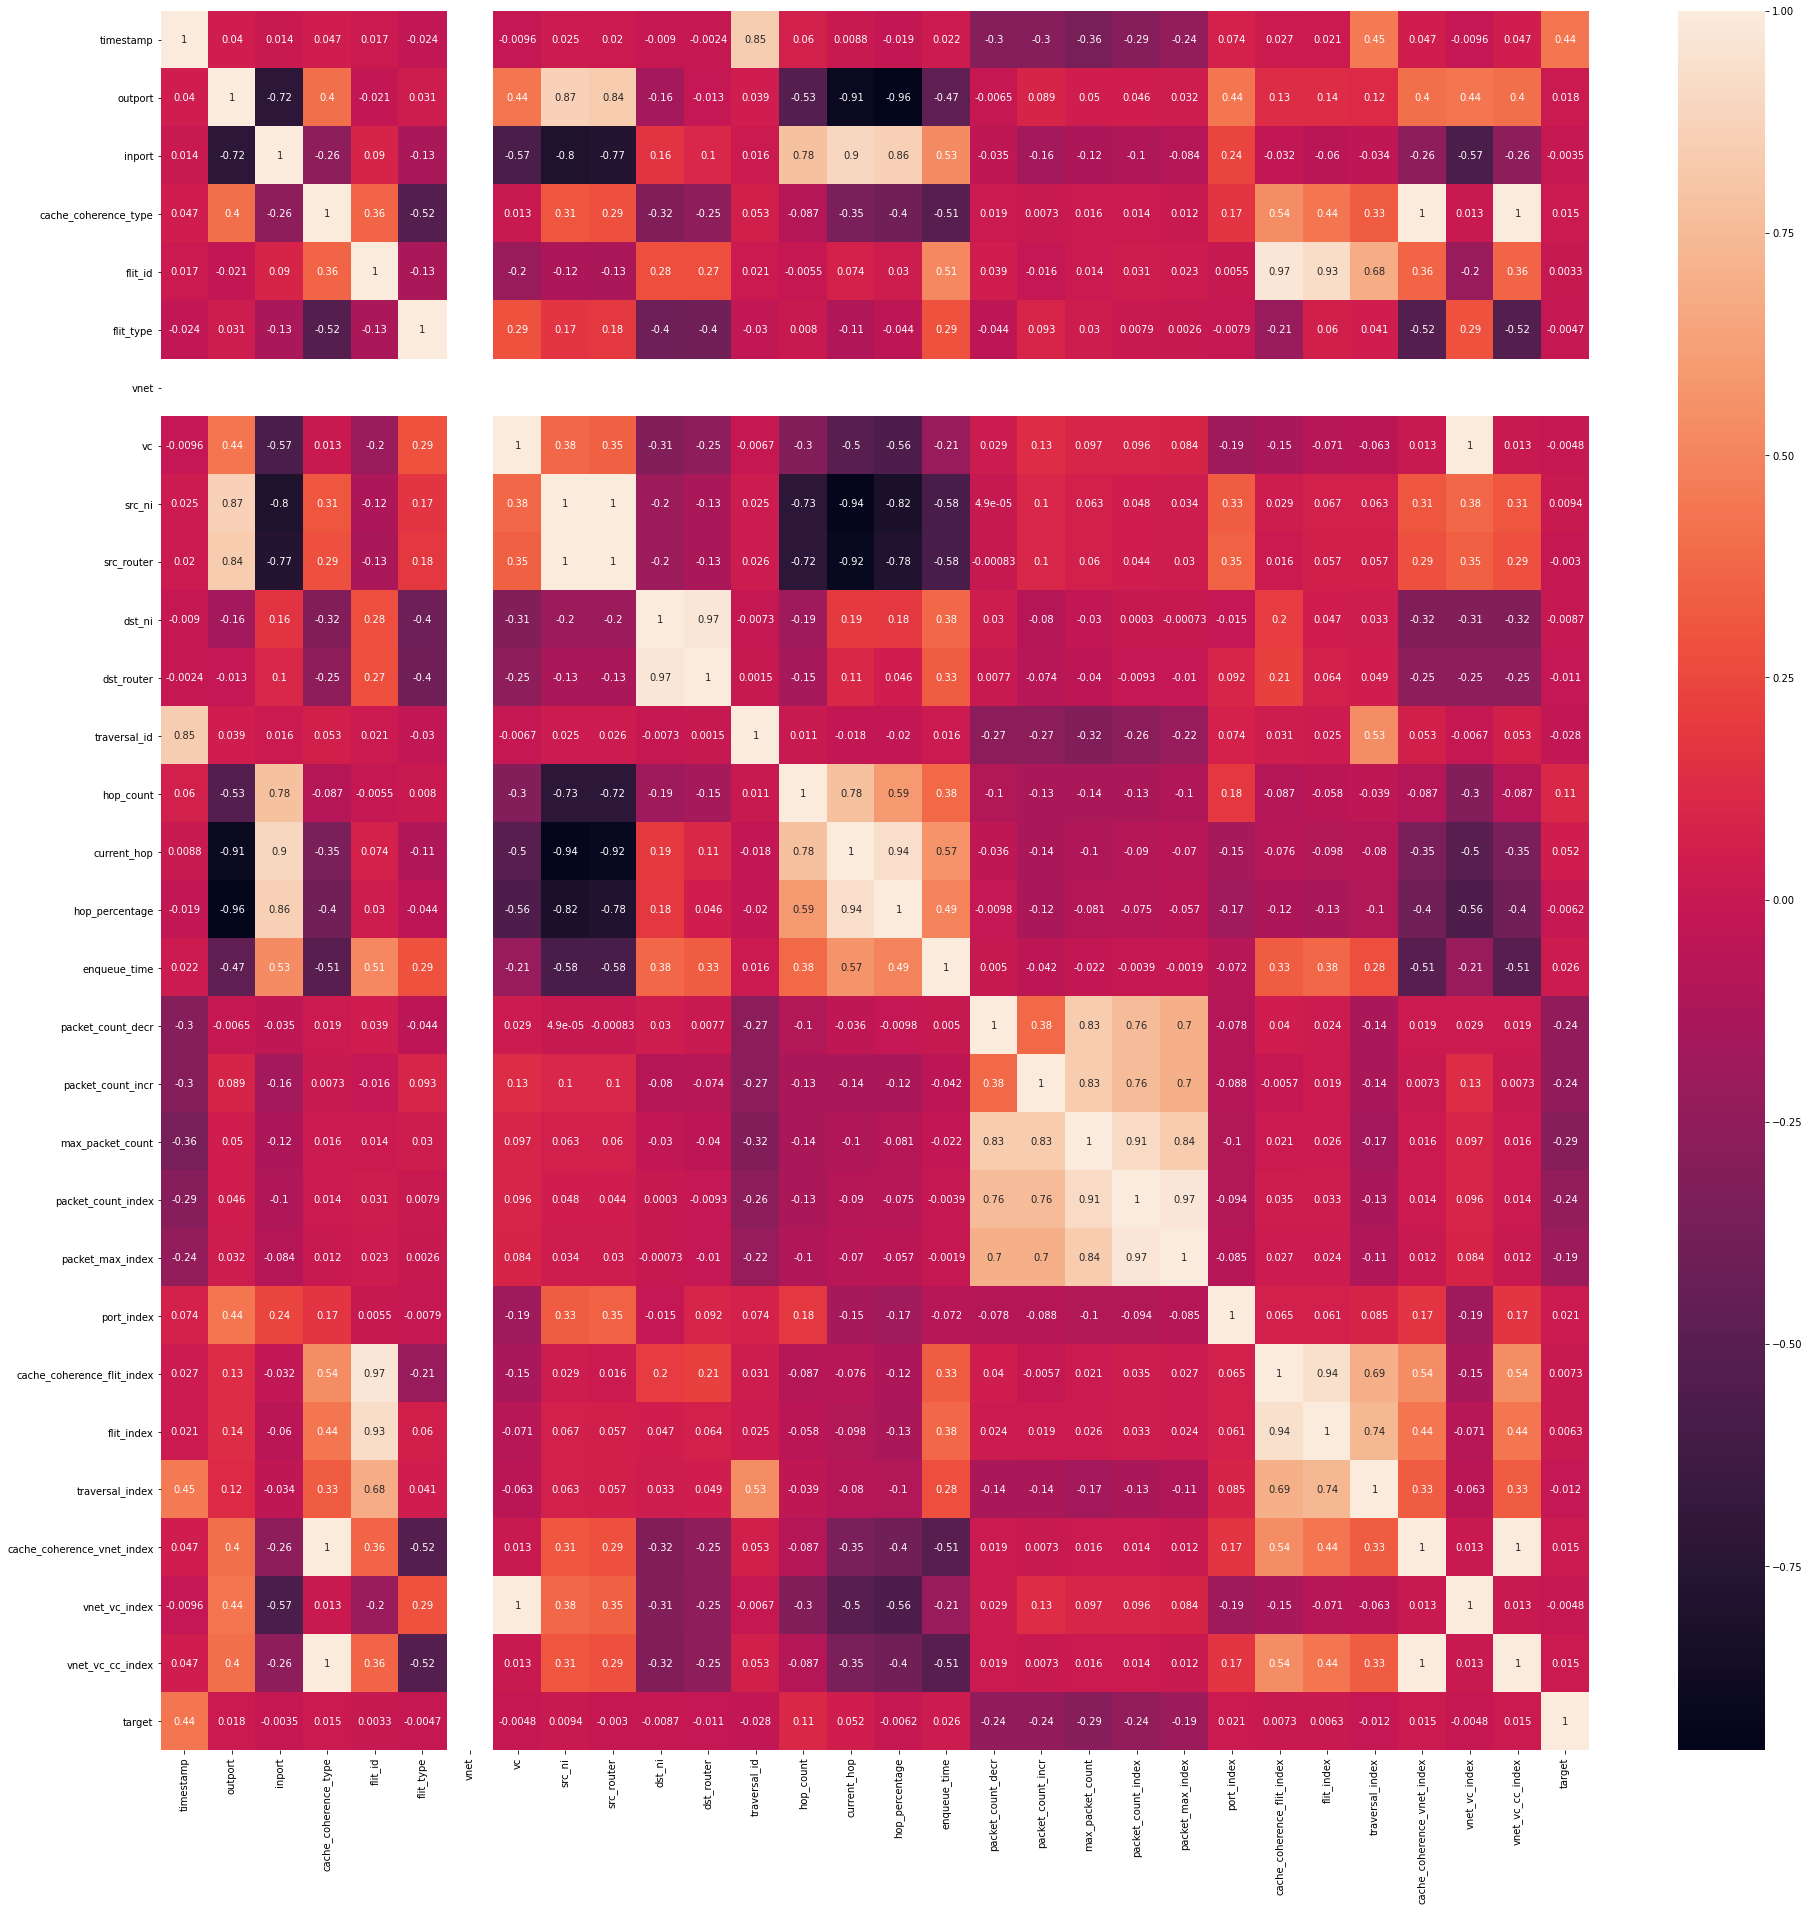

In [11]:
plt.figure(figsize=(32,32))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [12]:
train_X = df.drop(columns=['target','timestamp','src_ni','src_router'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1,3,1,1,4,3,9,30,14,16,4,3,0.750000,16,1,1,1,1,1,3,1,4,64,3,27,9
1,1,3,1,1,4,3,9,30,14,8,5,4,0.800000,20,1,1,1,1,1,3,1,4,32,3,27,9
2,1,3,1,1,4,3,9,30,14,17,5,4,0.800000,20,1,1,1,1,1,3,1,4,68,3,27,9
3,4,2,2,1,4,3,9,29,13,18,3,1,0.333333,8,1,1,1,1,1,8,2,8,144,6,27,18
4,4,2,2,1,4,3,9,29,13,9,3,1,0.333333,8,1,1,1,1,1,8,2,8,72,6,27,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17377,1,3,5,2,2,3,9,30,14,10016,5,4,0.800000,27,1,1,1,1,1,3,10,20,200320,15,27,45
17378,1,3,5,3,2,3,9,30,14,10016,5,4,0.800000,34,1,1,1,1,1,3,15,30,300480,15,27,45
17379,1,3,5,4,2,3,9,30,14,10016,5,4,0.800000,41,1,1,1,1,1,3,20,40,400640,15,27,45
17380,1,3,5,5,3,3,9,30,14,10016,5,4,0.800000,48,1,1,1,1,1,3,25,75,751200,15,27,45


In [13]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.25,1.000000,0.000000,0.00,1.000000,0.0,0.000000,1.000000,1.000000,0.000723,0.666667,0.75,0.750000,0.24,0.0,0.0,0.0,0.0,0.0,0.375,0.000000,0.000000,0.000032,0.000000,0.000000,0.000000
1,0.25,1.000000,0.000000,0.00,1.000000,0.0,0.000000,1.000000,1.000000,0.000000,1.000000,1.00,0.800000,0.32,0.0,0.0,0.0,0.0,0.0,0.375,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.25,1.000000,0.000000,0.00,1.000000,0.0,0.000000,1.000000,1.000000,0.000813,1.000000,1.00,0.800000,0.32,0.0,0.0,0.0,0.0,0.0,0.375,0.000000,0.000000,0.000036,0.000000,0.000000,0.000000
3,1.00,0.666667,0.166667,0.00,1.000000,0.0,0.000000,0.966667,0.928571,0.000903,0.333333,0.25,0.333333,0.08,0.0,0.0,0.0,0.0,0.0,1.000,0.034483,0.046512,0.000112,0.166667,0.000000,0.166667
4,1.00,0.666667,0.166667,0.00,1.000000,0.0,0.000000,0.966667,0.928571,0.000090,0.333333,0.25,0.333333,0.08,0.0,0.0,0.0,0.0,0.0,1.000,0.034483,0.046512,0.000040,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17377,0.25,1.000000,0.666667,0.25,0.333333,0.0,0.000000,1.000000,1.000000,0.903983,1.000000,1.00,0.800000,0.46,0.0,0.0,0.0,0.0,0.0,0.375,0.310345,0.186047,0.200893,0.666667,0.000000,0.666667
17378,0.25,1.000000,0.666667,0.50,0.333333,0.0,0.000000,1.000000,1.000000,0.903983,1.000000,1.00,0.800000,0.60,0.0,0.0,0.0,0.0,0.0,0.375,0.482759,0.302326,0.301356,0.666667,0.000000,0.666667
17379,0.25,1.000000,0.666667,0.75,0.333333,0.0,0.000000,1.000000,1.000000,0.903983,1.000000,1.00,0.800000,0.74,0.0,0.0,0.0,0.0,0.0,0.375,0.655172,0.418605,0.401818,0.666667,0.000000,0.666667
17380,0.25,1.000000,0.666667,1.00,0.666667,0.0,0.000000,1.000000,1.000000,0.903983,1.000000,1.00,0.800000,0.88,0.0,0.0,0.0,0.0,0.0,0.375,0.827586,0.825581,0.753437,0.666667,0.000000,0.666667


In [14]:
train_X[train_X.duplicated()].shape

(86, 26)

In [15]:
corr_df = pd.concat([train_X, df[['target']]], axis = 1)
corr_df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.724040,0.404714,-0.021414,0.030912,NaN,0.438730,-0.155277,-0.012927,0.038543,-0.526957,-0.910380,-0.957177,-0.471682,-0.006540,0.088995,0.049546,0.045588,0.031680,0.436331,0.132802,0.135358,0.116620,0.404714,0.438730,0.404714,0.017608
inport,-0.724040,1.000000,-0.259504,0.089898,-0.129771,NaN,-0.567598,0.163343,0.103555,0.016372,0.782516,0.895733,0.856777,0.533340,-0.035322,-0.162961,-0.119144,-0.104528,-0.084159,0.240540,-0.032033,-0.060208,-0.034029,-0.259504,-0.567598,-0.259504,-0.003461
cache_coherence_type,0.404714,-0.259504,1.000000,0.363151,-0.524222,NaN,0.013282,-0.317422,-0.253853,0.052729,-0.087014,-0.349600,-0.396842,-0.505477,0.019183,0.007303,0.015915,0.014376,0.011932,0.167117,0.536943,0.438948,0.332151,1.000000,0.013282,1.000000,0.015443
flit_id,-0.021414,0.089898,0.363151,1.000000,-0.129646,NaN,-0.201331,0.280088,0.274855,0.020968,-0.005540,0.073689,0.030494,0.513368,0.039475,-0.015669,0.014304,0.030572,0.023263,0.005466,0.974010,0.928869,0.683409,0.363151,-0.201331,0.363151,0.003255
flit_type,0.030912,-0.129771,-0.524222,-0.129646,1.000000,NaN,0.290630,-0.404318,-0.396764,-0.030267,0.007997,-0.106373,-0.044019,0.294072,-0.044141,0.093236,0.029500,0.007867,0.002553,-0.007891,-0.213677,0.059551,0.040779,-0.524222,0.290630,-0.524222,-0.004698
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.438730,-0.567598,0.013282,-0.201331,0.290630,NaN,1.000000,-0.314268,-0.254232,-0.006723,-0.304599,-0.501518,-0.556967,-0.214678,0.028726,0.132472,0.096860,0.096259,0.083685,-0.191040,-0.146702,-0.071154,-0.062655,0.013282,1.000000,0.013282,-0.004843
dst_ni,-0.155277,0.163343,-0.317422,0.280088,-0.404318,NaN,-0.314268,1.000000,0.970519,-0.007269,-0.191660,0.194481,0.184067,0.376439,0.029770,-0.080321,-0.030375,0.000298,-0.000732,-0.014889,0.201434,0.046767,0.033092,-0.317422,-0.314268,-0.317422,-0.008728
dst_router,-0.012927,0.103555,-0.253853,0.274855,-0.396764,NaN,-0.254232,0.970519,1.000000,0.001525,-0.148403,0.110090,0.045912,0.329739,0.007687,-0.074109,-0.039911,-0.009273,-0.010416,0.092123,0.214455,0.064106,0.049429,-0.253853,-0.254232,-0.253853,-0.011080
traversal_id,0.038543,0.016372,0.052729,0.020968,-0.030267,NaN,-0.006723,-0.007269,0.001525,1.000000,0.010598,-0.018044,-0.020291,0.015515,-0.268167,-0.268150,-0.322261,-0.264850,-0.217272,0.074443,0.031064,0.024522,0.534600,0.052729,-0.006723,0.052729,-0.027525


Principal Component Analysis

In [16]:
pca = PCA(0.95)
pca.fit(train_X)
principal_components = pca.transform(train_X)
principal_components

array([[-0.91955125,  1.02447251, -0.00470472, ..., -0.21666337,
         0.43567716,  0.12288187],
       [-1.15592406,  0.98591332, -0.06602626, ..., -0.06338513,
         0.41609325, -0.02638829],
       [-1.15591731,  0.98587399, -0.06604853, ..., -0.06334913,
         0.41538187, -0.02621804],
       ...,
       [-0.88684433, -0.66447081,  0.01773878, ...,  0.10012244,
        -0.44985737, -0.14327737],
       [-0.87324038, -1.00891495,  0.3965905 , ...,  0.38117597,
        -0.45413762,  0.01155726],
       [-1.11515897,  1.01425948,  0.17913992, ...,  0.18240249,
        -0.47021337, -0.24223907]])

In [17]:
pca.explained_variance_ratio_

array([0.37618644, 0.19915273, 0.11457547, 0.09315055, 0.08404384,
       0.04362543, 0.04210207])

Text(0, 0.5, 'Variance')

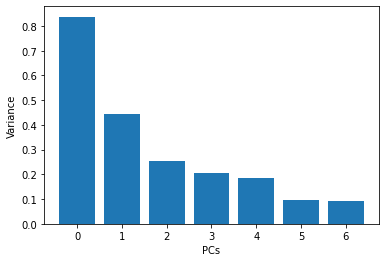

In [18]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xticks(features)
plt.xlabel("PCs")
plt.ylabel("Variance")

In [19]:
principal_df = pd.DataFrame(data = principal_components)
principal_df

,0,1,2,3,4,5,6
0,-0.919551,1.024473,-0.004705,0.522792,-0.216663,0.435677,0.122882
1,-1.155924,0.985913,-0.066026,0.528355,-0.063385,0.416093,-0.026388
2,-1.155917,0.985874,-0.066049,0.528401,-0.063349,0.415382,-0.026218
3,0.186674,0.839738,-0.453202,0.953035,-0.318978,0.531780,0.263632
4,0.186667,0.839784,-0.453184,0.952986,-0.319018,0.532501,0.263457
...,...,...,...,...,...,...,...
17377,-0.866698,-0.124566,-0.377119,-0.092686,-0.018995,-0.450406,-0.112357
17378,-0.876771,-0.394518,-0.179690,0.002503,0.040564,-0.450132,-0.127817
17379,-0.886844,-0.664471,0.017739,0.097692,0.100122,-0.449857,-0.143277
17380,-0.873240,-1.008915,0.396591,0.367528,0.381176,-0.454138,0.011557


In [20]:
final_df = pd.concat([principal_df, df[['target']]], axis = 1)
final_df.corr()

,0,1,2,3,4,5,6,target
0,1.000000e+00,-4.191891e-16,-3.456260e-16,-6.122092e-16,-1.541874e-16,3.646273e-16,2.143926e-15,-0.017047
1,-4.191891e-16,1.000000e+00,1.376384e-15,6.585324e-16,-2.272090e-16,5.305230e-16,1.142447e-15,-0.017666
2,-3.456260e-16,1.376384e-15,1.000000e+00,-2.089238e-15,-4.300171e-16,2.856415e-16,1.081413e-15,-0.038682
3,-6.122092e-16,6.585324e-16,-2.089238e-15,1.000000e+00,4.767951e-16,4.878727e-16,-2.085815e-16,0.013587
4,-1.541874e-16,-2.272090e-16,-4.300171e-16,4.767951e-16,1.000000e+00,4.127260e-17,-1.504331e-15,0.046451
5,3.646273e-16,5.305230e-16,2.856415e-16,4.878727e-16,4.127260e-17,1.000000e+00,4.120953e-16,-0.037040
6,2.143926e-15,1.142447e-15,1.081413e-15,-2.085815e-16,-1.504331e-15,4.120953e-16,1.000000e+00,-0.045054
target,-1.704718e-02,-1.766645e-02,-3.868192e-02,1.358724e-02,4.645127e-02,-3.703952e-02,-4.505432e-02,1.000000


In [0]:
dimentional_components = pd.DataFrame()
dimentional_components['target'] = corr_df["target"]
dimentional_components['pca-one'] = principal_components[:,0]
dimentional_components['pca-two'] = principal_components[:,1] 
dimentional_components['pca-three'] = principal_components[:,2]

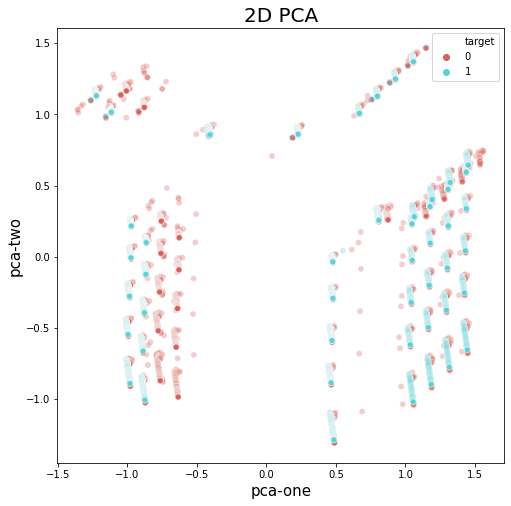

In [22]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

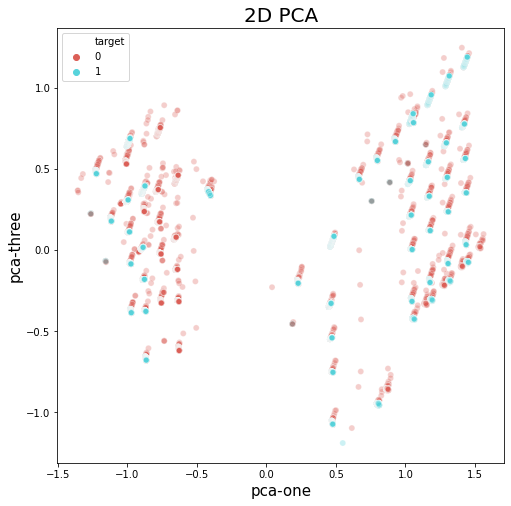

In [23]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-one", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

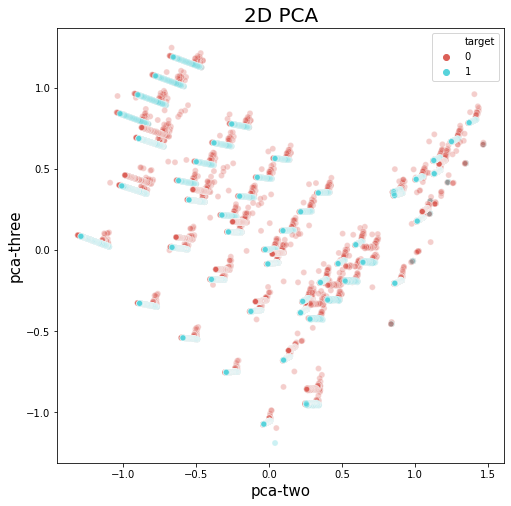

In [24]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 2', fontsize = 15)
ax.set_ylabel('Principal Component 3', fontsize = 15)
ax.set_title('2D PCA', fontsize = 20)
sns.scatterplot(
    x="pca-two", y="pca-three",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax
)

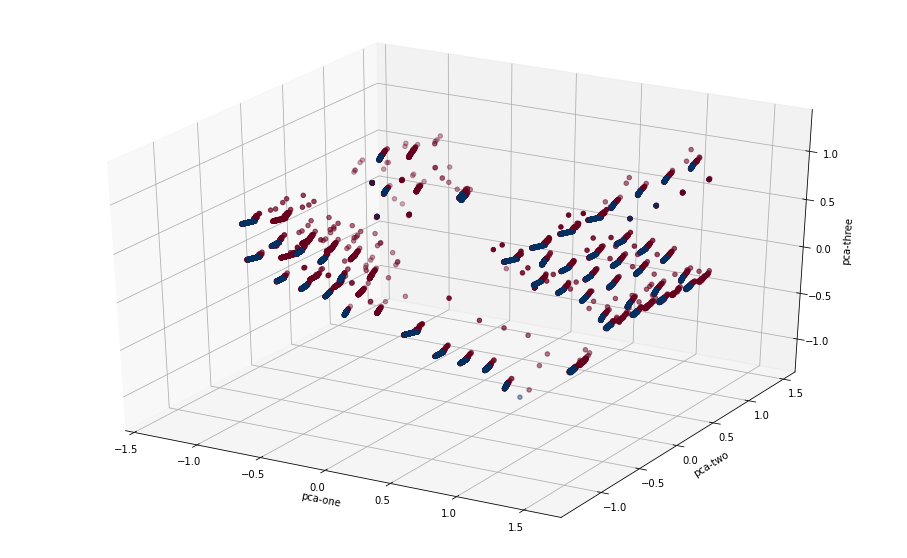

In [25]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-two'], 
    zs=dimentional_components['pca-three'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

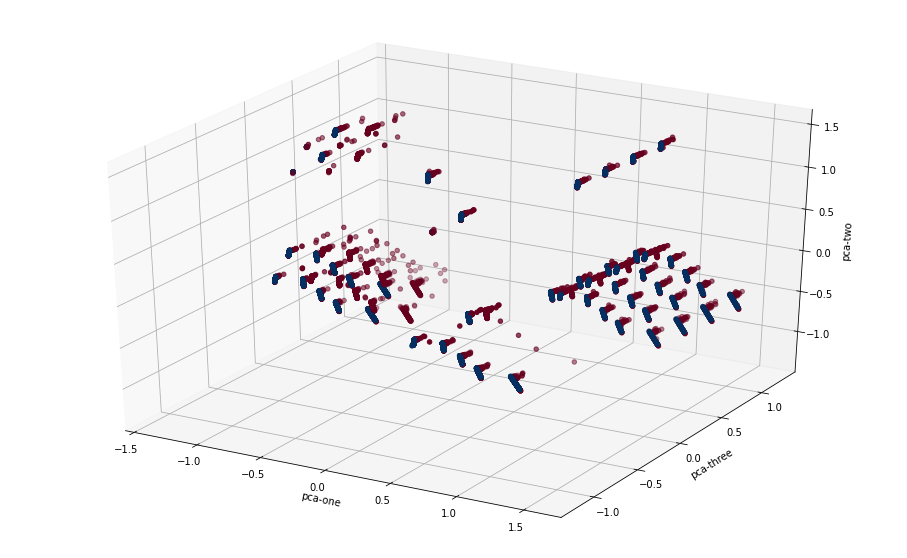

In [26]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-one'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-two'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-two')
plt.show()

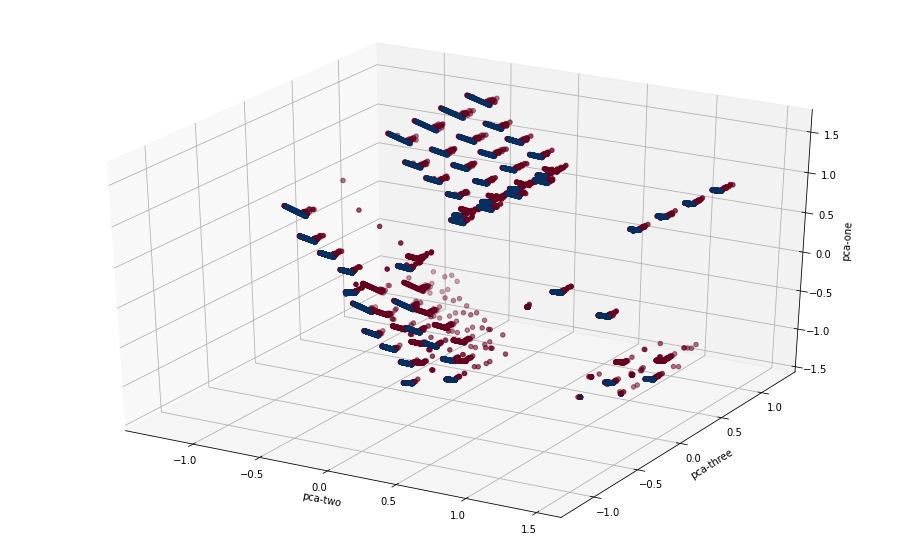

In [27]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=dimentional_components['pca-two'], 
    ys=dimentional_components['pca-three'], 
    zs=dimentional_components['pca-one'], 
    c=dimentional_components['target'], 
    cmap='RdBu'
)
ax.set_xlabel('pca-two')
ax.set_ylabel('pca-three')
ax.set_zlabel('pca-one')
plt.show()

T-distributed Stochastic Neighbor Embedding

In [28]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_components = tsne.fit_transform(train_X)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 50.28853368759155 seconds


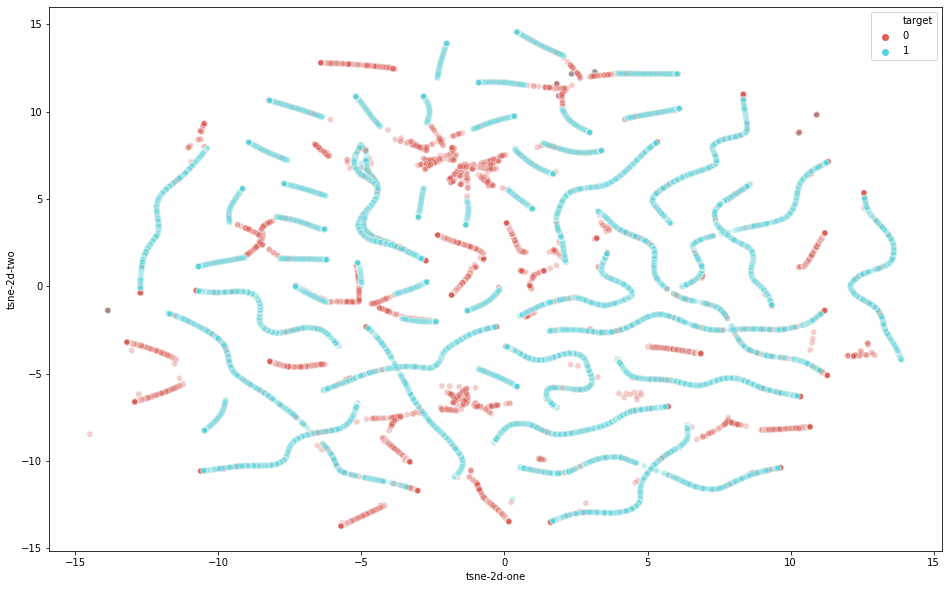

In [29]:
dimentional_components['tsne-2d-one'] = tsne_components[:,0]
dimentional_components['tsne-2d-two'] = tsne_components[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3
)

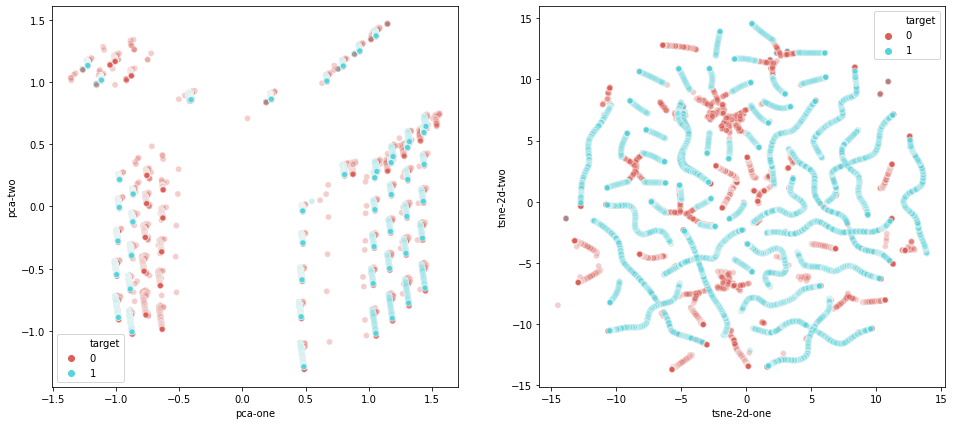

In [30]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)

In [31]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_pca_components = tsne.fit_transform(principal_components)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 43.7057740688324 seconds


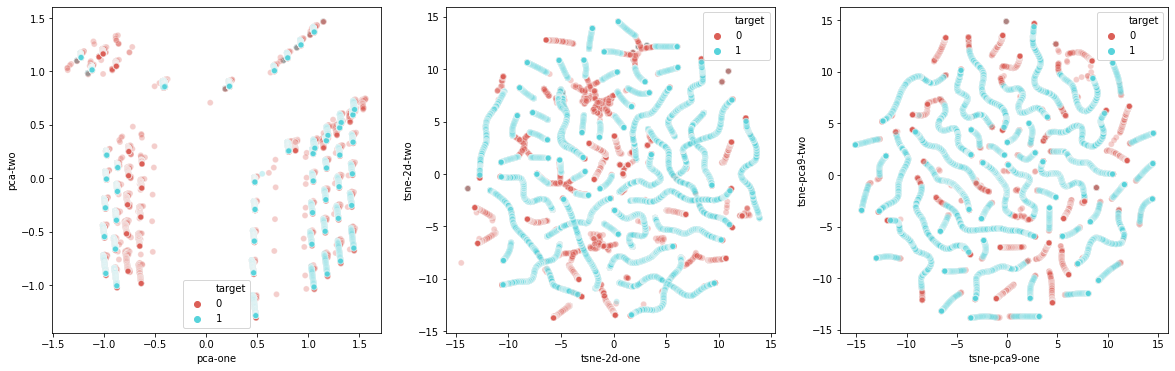

In [32]:
dimentional_components['tsne-pca9-one'] = tsne_pca_components[:,0]
dimentional_components['tsne-pca9-two'] = tsne_pca_components[:,1]
plt.figure(figsize=(20,6))
ax1 = plt.subplot(1, 3, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 3, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax2
)
ax3 = plt.subplot(1, 3, 3)
sns.scatterplot(
    x="tsne-pca9-one", y="tsne-pca9-two",
    hue="target",
    palette=sns.color_palette("hls", 2),
    data=dimentional_components,
    legend="full",
    alpha=0.3,
    ax=ax3
)

#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [34]:
train_Y = df['target']
train_Y.value_counts()

0    8785
1    8597
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs       Score
16            max_packet_count  590.705156
15           packet_count_incr  298.002983
14           packet_count_decr  292.702173
17          packet_count_index  268.647465
18            packet_max_index  173.550857
10                   hop_count   43.623860
11                 current_hop   11.289194
19                  port_index    2.859885
0                      outport    1.860454
9                 traversal_id    1.834251
13                enqueue_time    1.049206
22             traversal_index    0.792974
2         cache_coherence_type    0.717925
23  cache_coherence_vnet_index    0.717925
25            vnet_vc_cc_index    0.717925
4                    flit_type    0.414796
12              hop_percentage    0.260587


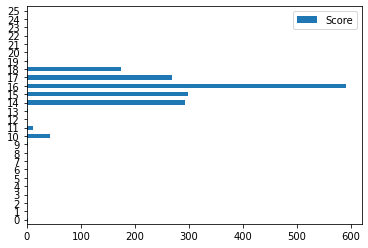

In [37]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [40]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 71.21898597626753
Test Prediction  72.04486626402071


In [42]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
7,dst_ni,22.293071
11,current_hop,9.398863
0,outport,7.023961
12,hop_percentage,4.186884
10,hop_count,3.852002
19,port_index,2.562585
13,enqueue_time,2.085040
21,flit_index,0.504381
20,cache_coherence_flit_index,0.399714
25,vnet_vc_cc_index,0.212113


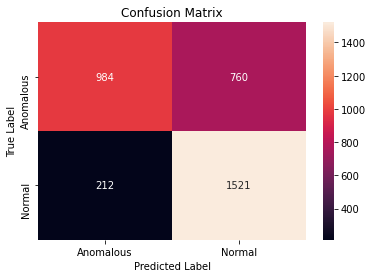

In [43]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67      1744
           1       0.67      0.88      0.76      1733

    accuracy                           0.72      3477
   macro avg       0.74      0.72      0.71      3477
weighted avg       0.75      0.72      0.71      3477



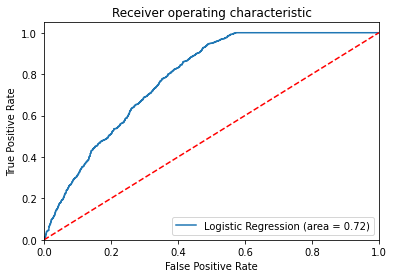

In [45]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

KNeighbors Classifier

In [46]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [48]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 79.04350952894642
Test Prediction  69.85907391429393


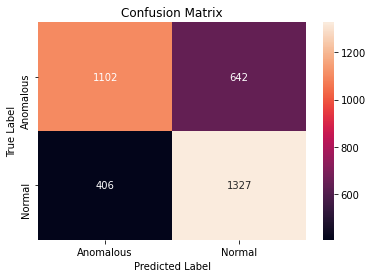

In [49]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [50]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.73      0.63      0.68      1744
           1       0.67      0.77      0.72      1733

    accuracy                           0.70      3477
   macro avg       0.70      0.70      0.70      3477
weighted avg       0.70      0.70      0.70      3477



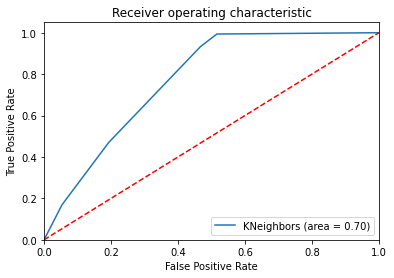

In [51]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [53]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [55]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 59.180151024811224
Test Prediction Score 59.90796663790624


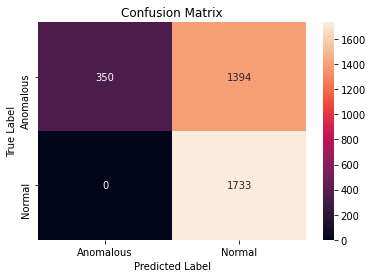

In [56]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [57]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       1.00      0.20      0.33      1744
           1       0.55      1.00      0.71      1733

    accuracy                           0.60      3477
   macro avg       0.78      0.60      0.52      3477
weighted avg       0.78      0.60      0.52      3477



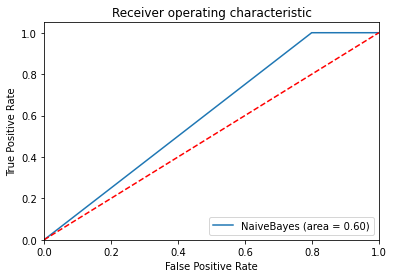

In [58]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [59]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [60]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 11124 samples, validate on 2781 samples
Epoch 1/10
11124/11124 [==============================] - 1s 60us/step - loss: 0.2521 - accuracy: 0.4966 - val_loss: 0.2505 - val_accuracy: 0.4732
Epoch 2/10
11124/11124 [==============================] - 0s 37us/step - loss: 0.2491 - accuracy: 0.5092 - val_loss: 0.2478 - val_accuracy: 0.4851
Epoch 3/10
11124/11124 [==============================] - 0s 37us/step - loss: 0.2417 - accuracy: 0.5369 - val_loss: 0.2355 - val_accuracy: 0.5739
Epoch 4/10
11124/11124 [==============================] - 0s 36us/step - loss: 0.2318 - accuracy: 0.5811 - val_loss: 0.2281 - val_accuracy: 0.5922
Epoch 5/10
11124/11124 [==============================] - 0s 37us/step - loss: 0.2271 - accuracy: 0.5971 - val_loss: 0.2258 - val_accuracy: 0.5890
Epoch 6/10
11124/11124 [==============================] - 0s 37us/step - loss: 0.2245 - accuracy: 0.6061 - val_loss: 0.2238 - val_accuracy: 0.5948
Epoch 7/10
11124/11124 [==============================] - 0s 36us/ste

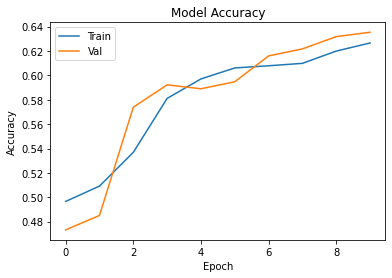

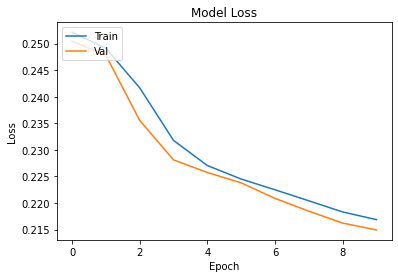

In [61]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [62]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 64.65%


3-Layer Neural Network

In [63]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=15, validation_split=0.2 )

Train on 11124 samples, validate on 2781 samples
Epoch 1/15
11124/11124 [==============================] - 0s 41us/step - loss: 0.2493 - accuracy: 0.5195 - val_loss: 0.2496 - val_accuracy: 0.5192
Epoch 2/15
11124/11124 [==============================] - 0s 36us/step - loss: 0.2490 - accuracy: 0.5243 - val_loss: 0.2492 - val_accuracy: 0.5228
Epoch 3/15
11124/11124 [==============================] - 0s 41us/step - loss: 0.2488 - accuracy: 0.5269 - val_loss: 0.2489 - val_accuracy: 0.5473
Epoch 4/15
11124/11124 [==============================] - 0s 37us/step - loss: 0.2486 - accuracy: 0.5358 - val_loss: 0.2486 - val_accuracy: 0.5545
Epoch 5/15
11124/11124 [==============================] - 0s 37us/step - loss: 0.2484 - accuracy: 0.5492 - val_loss: 0.2484 - val_accuracy: 0.5584
Epoch 6/15
11124/11124 [==============================] - 0s 37us/step - loss: 0.2482 - accuracy: 0.5477 - val_loss: 0.2481 - val_accuracy: 0.5574
Epoch 7/15
11124/11124 [==============================] - 0s 36us/ste

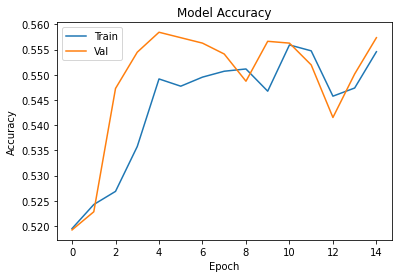

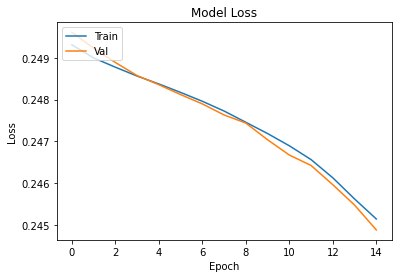

In [64]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [65]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 55.88%


4-Layer Neural Network



In [66]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 11124 samples, validate on 2781 samples
Epoch 1/30
11124/11124 [==============================] - 0s 42us/step - loss: 0.2500 - accuracy: 0.5086 - val_loss: 0.2501 - val_accuracy: 0.4851
Epoch 2/30
11124/11124 [==============================] - 0s 37us/step - loss: 0.2499 - accuracy: 0.5117 - val_loss: 0.2502 - val_accuracy: 0.4851
Epoch 3/30
11124/11124 [==============================] - 0s 38us/step - loss: 0.2499 - accuracy: 0.5117 - val_loss: 0.2503 - val_accuracy: 0.4851
Epoch 4/30
11124/11124 [==============================] - 0s 37us/step - loss: 0.2499 - accuracy: 0.5117 - val_loss: 0.2504 - val_accuracy: 0.4851
Epoch 5/30
11124/11124 [==============================] - 0s 40us/step - loss: 0.2499 - accuracy: 0.5117 - val_loss: 0.2504 - val_accuracy: 0.4851
Epoch 6/30
11124/11124 [==============================] - 0s 42us/step - loss: 0.2499 - accuracy: 0.5117 - val_loss: 0.2504 - val_accuracy: 0.4851
Epoch 7/30
11124/11124 [==============================] - 0s 40us/ste

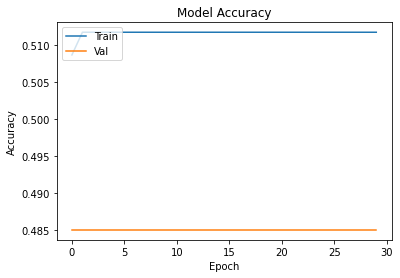

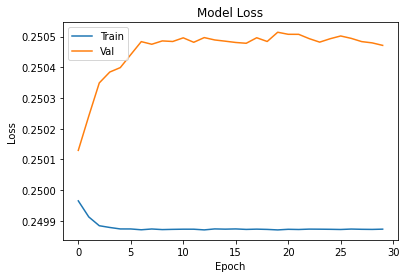

In [67]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [68]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 50.16%


5-Layer Neural Network Optimized

In [69]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 11124 samples, validate on 2781 samples
Epoch 1/100
11124/11124 [==============================] - 1s 125us/step - loss: 0.2321 - accuracy: 0.6015 - val_loss: 0.2465 - val_accuracy: 0.5297
Epoch 2/100
11124/11124 [==============================] - 1s 71us/step - loss: 0.2037 - accuracy: 0.6598 - val_loss: 0.2515 - val_accuracy: 0.6868
Epoch 3/100
11124/11124 [==============================] - 1s 69us/step - loss: 0.1958 - accuracy: 0.6778 - val_loss: 0.1857 - val_accuracy: 0.6969
Epoch 4/100
11124/11124 [==============================] - 1s 68us/step - loss: 0.1907 - accuracy: 0.6859 - val_loss: 0.1921 - val_accuracy: 0.6904
Epoch 5/100
11124/11124 [==============================] - 1s 70us/step - loss: 0.1902 - accuracy: 0.6860 - val_loss: 0.1973 - val_accuracy: 0.6846
Epoch 6/100
11124/11124 [==============================] - 1s 75us/step - loss: 0.1885 - accuracy: 0.6944 - val_loss: 0.1852 - val_accuracy: 0.7113
Epoch 7/100
11124/11124 [==============================] - 1s 

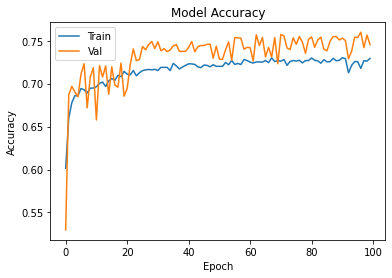

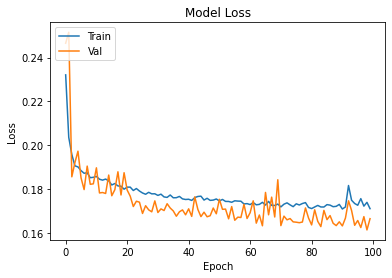

In [70]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [71]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 73.37%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [73]:
# GridSearchCV
param_grid={'max_depth':range(0,25,2) ,
            'max_features':range(0,25,2)}
dt_g=DecisionTreeClassifier(random_state = 42)
dt_cv=GridSearchCV(dt_g,param_grid,cv=3,scoring='accuracy',n_jobs=-1)
dt_cv.fit(X_train,y_train)

print("Best parameters:",dt_cv.best_params_)
print("Accuracy :",dt_cv.best_score_)

Best parameters: {'max_depth': 22, 'max_features': 24}
Accuracy : 0.8179072276159655


In [74]:
dt = DecisionTreeClassifier(max_depth=25,max_features=25,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=25, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [76]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 92.90902553038475
Test Prediction Score 88.32326718435432


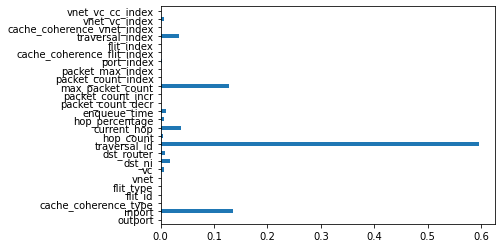

In [77]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

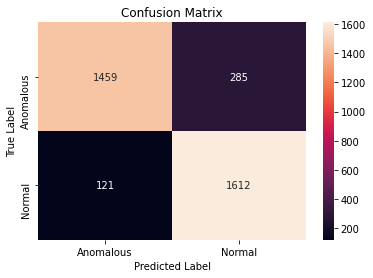

In [78]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [79]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88      1744
           1       0.85      0.93      0.89      1733

    accuracy                           0.88      3477
   macro avg       0.89      0.88      0.88      3477
weighted avg       0.89      0.88      0.88      3477



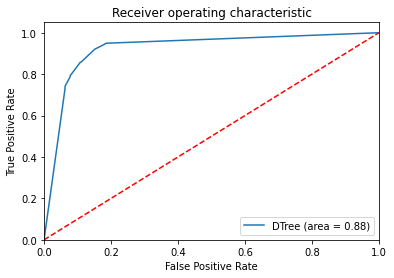

In [80]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250],
#            'max_features':range(0,25,2)}
#dt_g=RandomForestClassifier(random_state=42)
#dt_cv=GridSearchCV(dt_g,param_grid,cv=10,scoring='f1_micro',n_jobs=-1)
#dt_cv.fit(X_train,y_train)

#print("Best parameters:",dt_cv.best_params_)
#print("Accuracy :",dt_cv.best_score_)

In [83]:
rf = RandomForestClassifier(max_depth=25,max_features=25,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features=25,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [85]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 98.60481841064366
Test Prediction Score 89.21484037963762


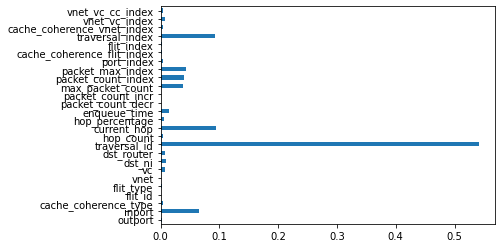

In [86]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

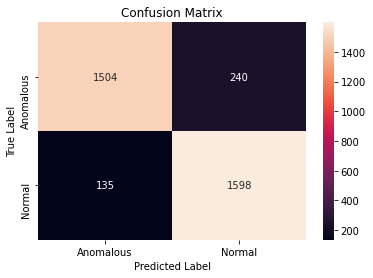

In [87]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [88]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      1744
           1       0.87      0.92      0.89      1733

    accuracy                           0.89      3477
   macro avg       0.89      0.89      0.89      3477
weighted avg       0.89      0.89      0.89      3477



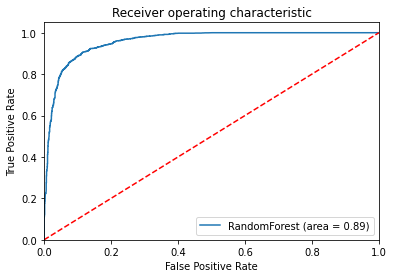

In [89]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
# GridSearchCV
#param_grid={'max_depth':range(0,25,2),
#            'n_estimators':[125,250,500],
#           'min_child_weight':[1,3,6]}
#xgb_g=XGBClassifier(random_state=42)
#xgb_cv=GridSearchCV(xgb_g,param_grid,cv=10,scoring='accuracy',n_jobs=-1)
#xgb_cv.fit(X_train,y_train)

#print("Best parameters:",xgb_cv.best_params_)
#print("Accuracy :",xgb_cv.best_score_)

In [92]:
xgbc = XGBClassifier(max_depth=25,min_child_weight=1,n_estimators=500,random_state=42)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=25,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [94]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.51096727795758
Test Prediction Score 94.82312338222606


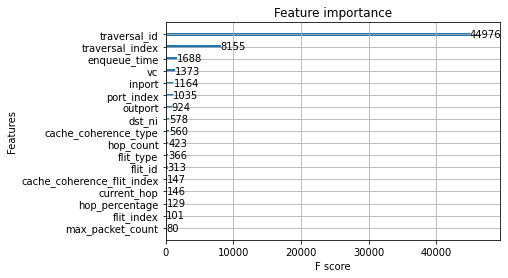

In [95]:
plot_importance(xgbc)
plt.show()

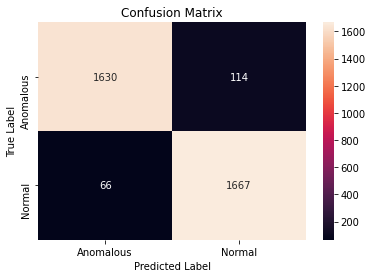

In [96]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [97]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.93      0.95      1744
           1       0.94      0.96      0.95      1733

    accuracy                           0.95      3477
   macro avg       0.95      0.95      0.95      3477
weighted avg       0.95      0.95      0.95      3477



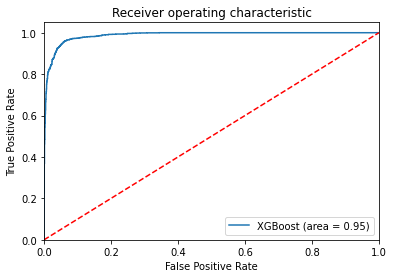

In [98]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
# GridSearchCV
#param_grid = {'n_estimators': [x for x in range(24,40,2)],
#              'learning_rate': [0.10, 0.125, 0.15, 0.175, 0.2]}
#lgb_g = lgb.LGBMClassifier(learning_rate = 0.125, metric = 'l1', n_estimators = 20, num_leaves = 38)
#lgb_cv = GridSearchCV(lgb_g, param_grid,cv=10)
#lgb_cv.fit(X_train, y_train)

#print("Best parameters:",lgb_cv.best_params_)
#print("Accuracy :",lgb_cv.best_score_)

In [101]:
gbm = lgb.LGBMClassifier(learning_rate = 0.2,  n_estimators = 500, max_depth = 21, random_state=42, min_child_weight=1,metric='l2')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.2, max_depth=21,
               metric='l2', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [103]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 87.8173318950018
Test Prediction Score 75.46735691688237


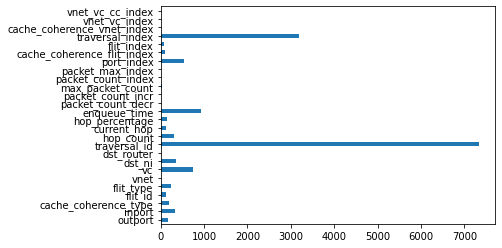

In [104]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

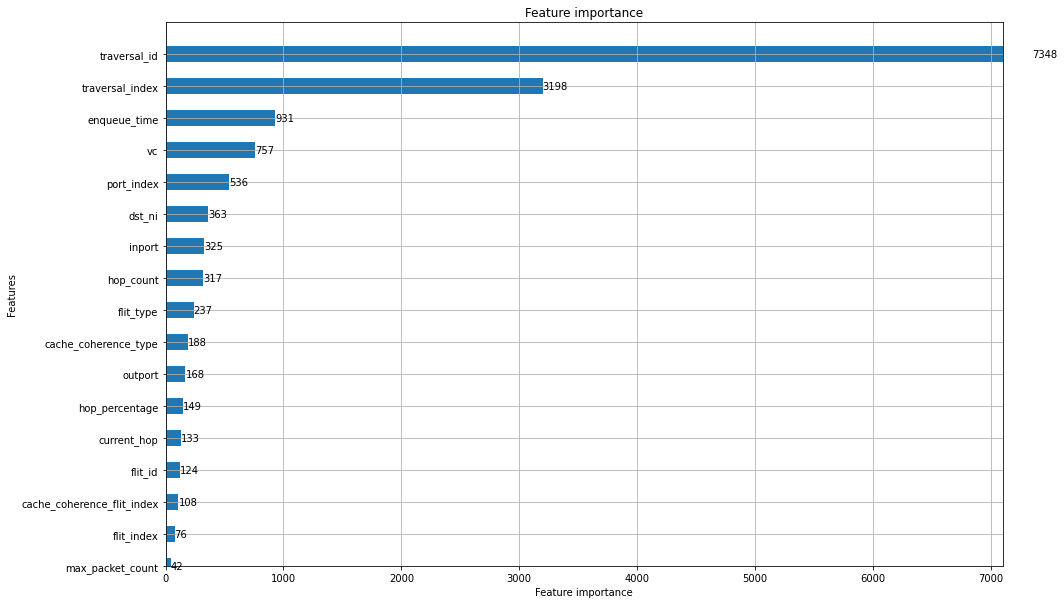

In [105]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,7100), ylim = (0,17), figsize = (15,10))
plt.show()

In [106]:
sorted(gbm.feature_importances_,reverse=True)

[7348,
 3198,
 931,
 757,
 536,
 363,
 325,
 317,
 237,
 188,
 168,
 149,
 133,
 124,
 108,
 76,
 42,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

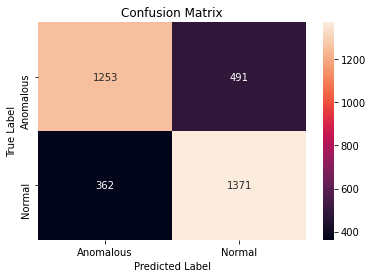

In [107]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [108]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1744
           1       0.74      0.79      0.76      1733

    accuracy                           0.75      3477
   macro avg       0.76      0.75      0.75      3477
weighted avg       0.76      0.75      0.75      3477



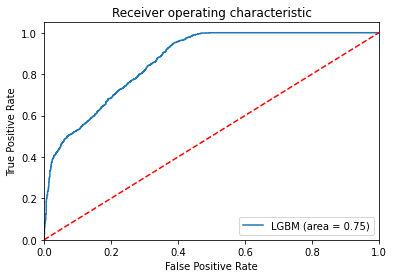

In [110]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()